In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uk-consumer-trends-current-price/10CN.csv
/kaggle/input/uk-consumer-trends-current-price/08CN.csv
/kaggle/input/uk-consumer-trends-current-price/06CN.csv
/kaggle/input/uk-consumer-trends-current-price/12CN.csv
/kaggle/input/uk-consumer-trends-current-price/DGCN.csv
/kaggle/input/uk-consumer-trends-current-price/NDGCN.csv
/kaggle/input/uk-consumer-trends-current-price/01CN.csv
/kaggle/input/uk-consumer-trends-current-price/SERCN.csv
/kaggle/input/uk-consumer-trends-current-price/0GSCN.csv
/kaggle/input/uk-consumer-trends-current-price/OCN.csv
/kaggle/input/uk-consumer-trends-current-price/02CN.csv
/kaggle/input/uk-consumer-trends-current-price/04CN.csv
/kaggle/input/uk-consumer-trends-current-price/SDGCN.csv
/kaggle/input/uk-consumer-trends-current-price/11CN.csv
/kaggle/input/uk-consumer-trends-current-price/05CN.csv
/kaggle/input/uk-consumer-trends-current-price/TGCN.csv
/kaggle/input/uk-consumer-trends-current-price/03CN.csv
/kaggle/input/uk-consumer-trends-current-pric

In this notebook we're going to explore the time series of UK consumer trends from 1997 to 2022.

Import the data set.

In [2]:
df = pd.read_csv('/kaggle/input/uk-consumer-trends-current-price/04CN.csv')

In [3]:
df.head()

,Time period and codes,"Housing, water, electricity, gas and other fuel",Actual rentals for housing,Actual rentals paid by tenants,Other actual rentals,Imputed rentals for housing,Imputed rentals for owner-occupiers,Other imputed rentals,Maintenance and repair of the dwelling,Materials,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,COICOP identifier code,04,04.1,04.1.1,04.1.2,04.2,04.2.1,04.2.2,04.3,04.3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CDID identifier code,ADFS,ADFT,ADUX,ADUY,ADFU,CDDF,ADVB,ADFV,ATKH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997 Q1,"41,064","5,917","5,899",18,"28,605","27,678",927,308,126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997 Q2,"39,496","6,023","6,004",19,"28,878","27,936",942,317,143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997 Q3,"39,264","6,053","6,033",20,"29,072","28,113",959,300,138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Understand the dataset.

In [4]:
df.shape

(142, 67)

In [5]:
df.columns

Index(['Time period and codes',
       'Housing, water, electricity, gas and other fuel',
       'Actual rentals for housing', 'Actual rentals paid by tenants',
       'Other actual rentals', 'Imputed rentals for housing',
       'Imputed rentals for owner-occupiers', 'Other imputed rentals',
       'Maintenance and repair of the dwelling', 'Materials', 'Services',
       'Water and miscellaneous services', 'Water supply', 'Refuse collection',
       'Sewerage collection', 'Other services\n[note 6]',
       'Electricity, gas and other fuels', 'Electricity', 'Gas',
       'Liquid fuels', 'Solid fuels', 'Heat energy\n[note 6]', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed:

In [6]:
df = df.loc[2:,['Time period and codes',
       'Housing, water, electricity, gas and other fuel',
       'Actual rentals for housing', 'Actual rentals paid by tenants',
       'Other actual rentals', 'Imputed rentals for housing',
       'Imputed rentals for owner-occupiers', 'Other imputed rentals',
       'Maintenance and repair of the dwelling', 'Materials', 'Services']]
df.head()

,Time period and codes,"Housing, water, electricity, gas and other fuel",Actual rentals for housing,Actual rentals paid by tenants,Other actual rentals,Imputed rentals for housing,Imputed rentals for owner-occupiers,Other imputed rentals,Maintenance and repair of the dwelling,Materials,Services
2,1997 Q1,"41,064","5,917","5,899",18,"28,605","27,678",927,308,126,182
3,1997 Q2,"39,496","6,023","6,004",19,"28,878","27,936",942,317,143,174
4,1997 Q3,"39,264","6,053","6,033",20,"29,072","28,113",959,300,138,162
5,1997 Q4,"41,305","6,072","6,052",20,"29,230","28,255",975,307,146,161
6,1998 Q1,"41,993","6,350","6,329",21,"29,489","28,505",984,324,152,172


In [7]:
df.isna().sum()

Time period and codes                              36
Housing, water, electricity, gas and other fuel    36
Actual rentals for housing                         36
Actual rentals paid by tenants                     36
Other actual rentals                               36
Imputed rentals for housing                        36
Imputed rentals for owner-occupiers                36
Other imputed rentals                              36
Maintenance and repair of the dwelling             36
Materials                                          36
Services                                           36
dtype: int64

In [8]:
# drop the NA
df = df.dropna()

In [9]:
df.isna().sum()

Time period and codes                              0
Housing, water, electricity, gas and other fuel    0
Actual rentals for housing                         0
Actual rentals paid by tenants                     0
Other actual rentals                               0
Imputed rentals for housing                        0
Imputed rentals for owner-occupiers                0
Other imputed rentals                              0
Maintenance and repair of the dwelling             0
Materials                                          0
Services                                           0
dtype: int64

In [10]:
df.shape

(104, 11)

In [11]:
# convert the strings to numbers. e.g. 3,000,000 to 3000000
for col in ['Housing, water, electricity, gas and other fuel','Actual rentals for housing', 'Actual rentals paid by tenants',
            'Other actual rentals', 'Imputed rentals for housing','Imputed rentals for owner-occupiers', 'Other imputed rentals',
            'Maintenance and repair of the dwelling', 'Materials', 'Services']:
    df[col] = df[col].str.replace(',', '').astype(int)

    


In [12]:
df.shape

(104, 11)

In [13]:
df.tail()

,Time period and codes,"Housing, water, electricity, gas and other fuel",Actual rentals for housing,Actual rentals paid by tenants,Other actual rentals,Imputed rentals for housing,Imputed rentals for owner-occupiers,Other imputed rentals,Maintenance and repair of the dwelling,Materials,Services
101,2021 Q4,94957,22072,21984,88,58611,55474,3137,929,484,445
102,2022 Q1,96712,22162,22074,88,59220,56047,3173,895,383,512
103,2022 Q2,95884,22351,22262,89,59818,56612,3206,925,407,518
104,2022 Q3,94068,22544,22453,91,60531,57286,3245,922,371,551
105,2022 Q4,106926,22731,22639,92,61295,58007,3288,922,395,527


In [14]:
df = df.set_index('Time period and codes')

To visualize the expenditure on Housing and energy, etc.

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
color_pal = sns.color_palette()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


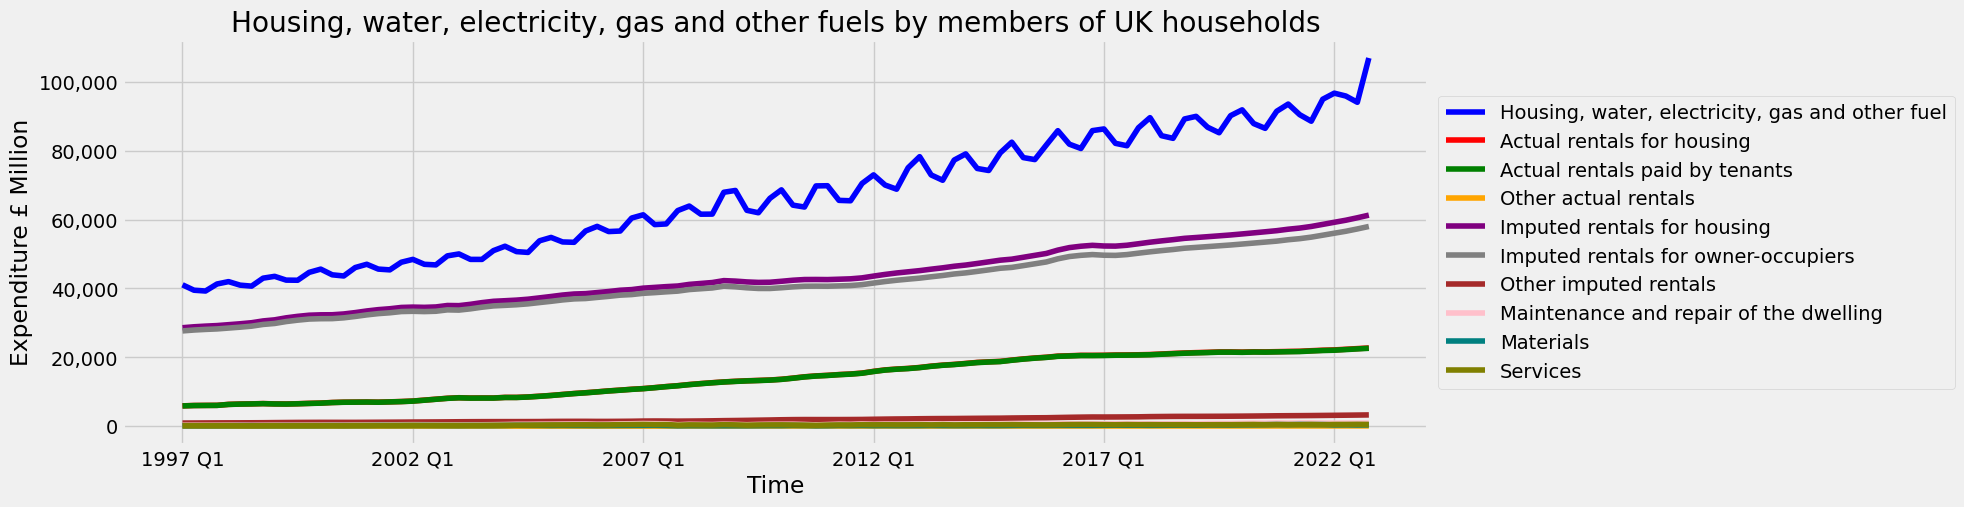

In [16]:
import matplotlib.ticker as ticker

# define a list of colors
color_pal = ['blue', 'red', 'green', 'orange', 'purple', 'gray', 'brown', 'pink', 'teal', 'olive']

plt.figure(figsize=(15,5))
for i, col in enumerate(['Housing, water, electricity, gas and other fuel',
       'Actual rentals for housing', 'Actual rentals paid by tenants',
       'Other actual rentals', 'Imputed rentals for housing',
       'Imputed rentals for owner-occupiers', 'Other imputed rentals',
       'Maintenance and repair of the dwelling', 'Materials', 'Services']):
    df[col].plot(style='-', color=color_pal[i], label=col)
# format the y-axis tick labels
formatter = ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Time')
plt.ylabel('Expenditure £ Million')
plt.title('Housing, water, electricity, gas and other fuels by members of UK households')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


To visualize the time series of other types of expenditure

In [17]:
df = pd.read_csv('/kaggle/input/uk-consumer-trends-current-price/OCN.csv')

In [18]:
df.head()

,Time period and codes,Total expenditure,Net tourism,Total domestic expenditure,Food and drink,"Alcohol, tobacco and narcotics",Clothing and footwear,Housing,"Furnishings, household equipment and routine maintenance of the house",Health,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,COICOP identifier code,NAT0,TOUR,0,01,02,03,04,05,06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CDID identifier code,ABPB,ABTE,ABQI,ABZV,ADFL,ADFP,ADFS,ADFY,ADGP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997 Q1,"144,887",291,"144,596","12,939","7,207","6,044","41,064","8,072","2,474",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997 Q2,"150,474",607,"149,867","13,438","7,529","6,827","39,496","7,663","2,413",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997 Q3,"155,809",965,"154,844","12,934","7,563","6,929","39,264","7,650","2,415",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.tail()

,Time period and codes,Total expenditure,Net tourism,Total domestic expenditure,Food and drink,"Alcohol, tobacco and narcotics",Clothing and footwear,Housing,"Furnishings, household equipment and routine maintenance of the house",Health,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.columns

Index(['Time period and codes', 'Total expenditure', 'Net tourism',
       'Total domestic expenditure', 'Food and drink',
       'Alcohol, tobacco and narcotics', 'Clothing and footwear', 'Housing',
       'Furnishings, household equipment and routine maintenance of the house',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels', 'Miscellaneous', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 5

In [21]:
df = df.loc[2:,['Time period and codes', 'Total expenditure', 'Net tourism',
       'Total domestic expenditure', 'Food and drink',
       'Alcohol, tobacco and narcotics', 'Clothing and footwear', 'Housing',
       'Furnishings, household equipment and routine maintenance of the house',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels']]
df = df.dropna()
df.shape


(104, 15)

In [22]:
df = df.set_index('Time period and codes')
for col in ['Total expenditure', 'Net tourism',
       'Total domestic expenditure', 'Food and drink',
       'Alcohol, tobacco and narcotics', 'Clothing and footwear', 'Housing',
       'Furnishings, household equipment and routine maintenance of the house',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels']:
    df[col] = df[col].str.replace(',', '').astype(int)

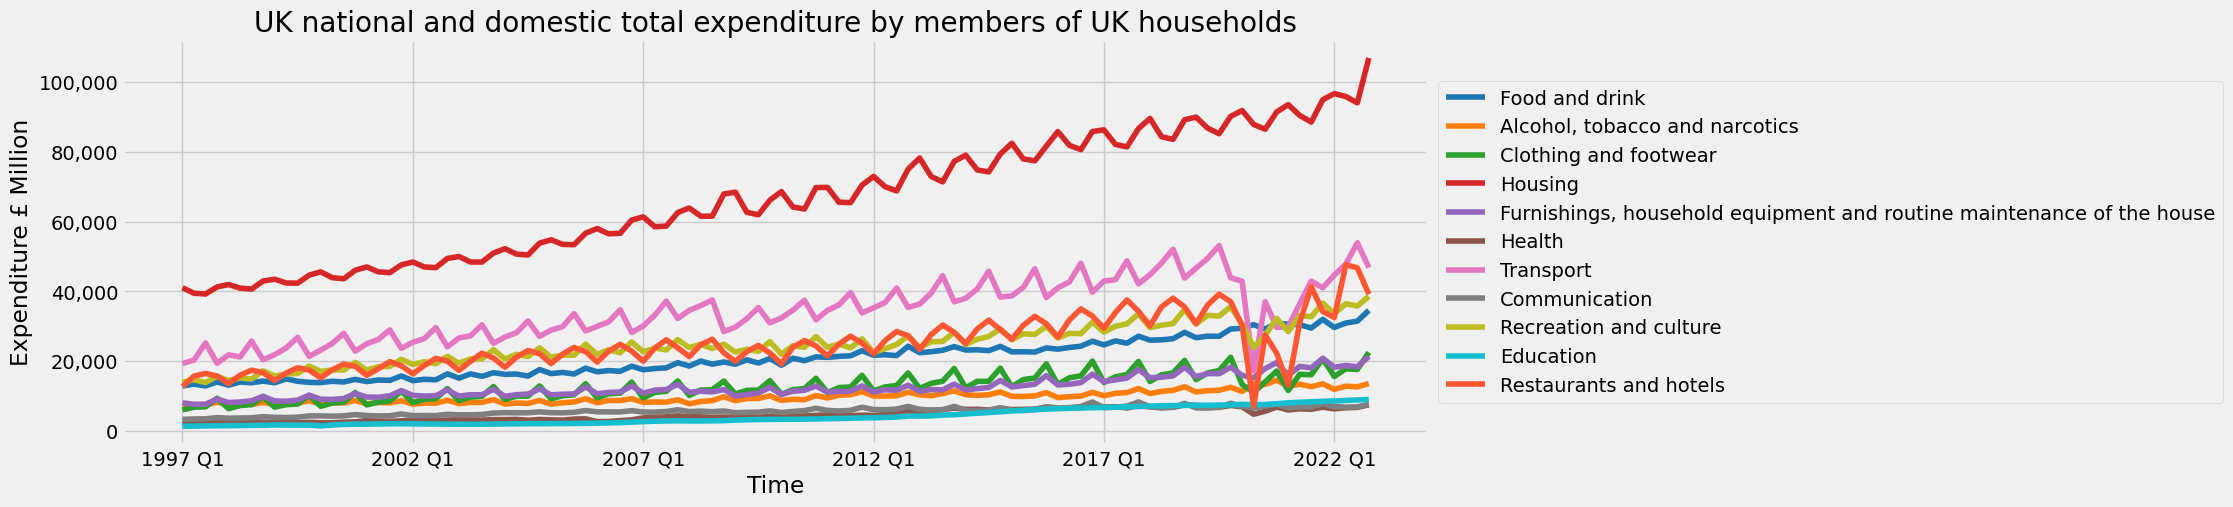

In [23]:
# define a list of colors
color_pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
             '#FF5733', '#581845', '#FFC300', '#900C3F', '#C70039',
             '#FF5733', '#DAF7A6', '#FFC300', '#FF5733', '#00C9A7',
             '#581845', '#FFC300', '#900C3F', '#FF5733', '#DAF7A6',
             '#00C9A7', '#FFC300', '#C70039', '#DAF7A6', '#FFC300']



plt.figure(figsize=(15,5))
for i, col in enumerate([ 'Food and drink',
       'Alcohol, tobacco and narcotics', 'Clothing and footwear', 'Housing',
       'Furnishings, household equipment and routine maintenance of the house',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels']):
    df[col].plot(style='-', color=color_pal[i], label=col)

# format the y-axis tick labels
formatter = ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Time')
plt.ylabel('Expenditure £ Million')
plt.title('UK national and domestic total expenditure by members of UK households')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()


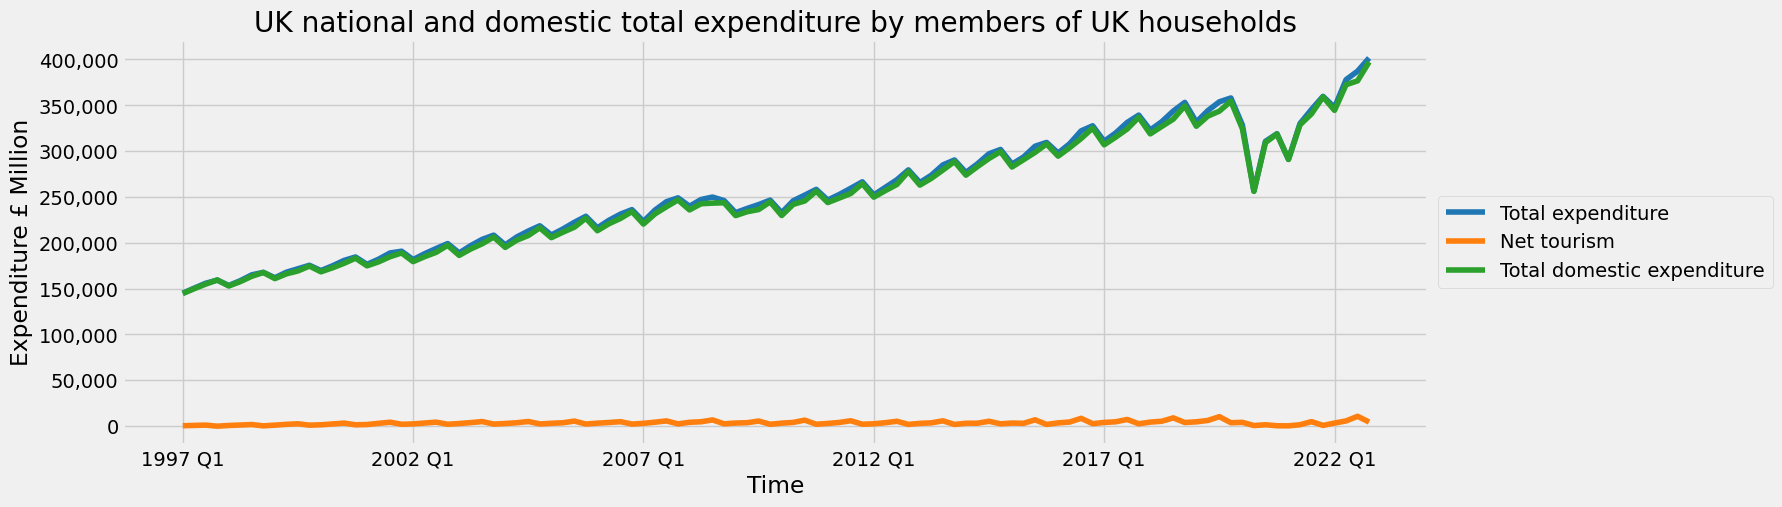

In [24]:
# define a list of colors
color_pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
             '#FF5733', '#581845', '#FFC300', '#900C3F', '#C70039',
             '#FF5733', '#DAF7A6', '#FFC300', '#FF5733', '#00C9A7',
             '#581845', '#FFC300', '#900C3F', '#FF5733', '#DAF7A6',
             '#00C9A7', '#FFC300', '#C70039', '#DAF7A6', '#FFC300']



plt.figure(figsize=(15,5))
for i, col in enumerate([ 'Total expenditure', 'Net tourism',
       'Total domestic expenditure']):
    df[col].plot(style='-', color=color_pal[i], label=col)

# format the y-axis tick labels
formatter = ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Time')
plt.ylabel('Expenditure £ Million')
plt.title('UK national and domestic total expenditure by members of UK households')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

To visualize the proportion of differenti expenditure as time shifts (stacked area chart)

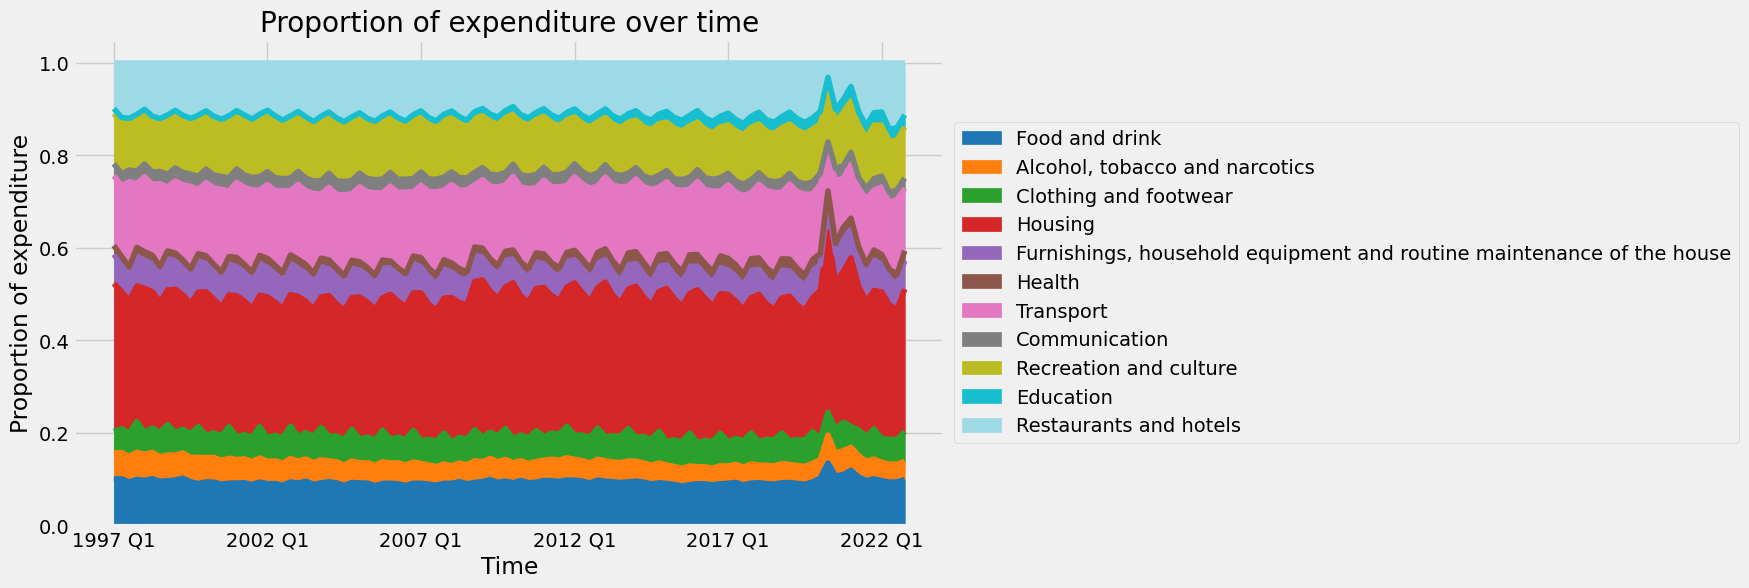

In [25]:
# group the data by time and calculate the total spending and proportion of each expenditure type
df_grouped = df.loc[:,[ 'Food and drink',
       'Alcohol, tobacco and narcotics', 'Clothing and footwear', 'Housing',
       'Furnishings, household equipment and routine maintenance of the house',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels']].groupby('Time period and codes').sum()
df_prop = df_grouped.divide(df_grouped.sum(axis=1), axis=0)

# plot a stacked area chart
ax = df_prop.plot.area(figsize=(10, 6), cmap='tab20')
ax.set_xlabel('Time')
ax.set_ylabel('Proportion of expenditure')
ax.set_title('Proportion of expenditure over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


Conclusion

The analysis shows that overall expenditure by members of UK households has been increasing at a slightly faster pace since 2019. This trend is evident across most expenditure categories, but there are certain categories that display prominent seasonal changes, such as energy, transport, restaurant, clothing and footwear.

The impact of COVID-19 on household expenditure is also apparent, with a sharp decrease in spending on transport, hotels, and restaurants. However, as the data for 2022 Q1 shows, expenditure in these categories has begun to recover and follow the increasing trend seen in previous years.

The proportions of expenditure across the different categories have remained relatively stable over the years, with no significant changes observed.

Overall, the analysis provides valuable insights into household expenditure patterns, highlighting the impact of external factors such as seasonality and COVID-19, and the consistent nature of spending across different categories.